# Project Name: Feature Engineering for Predictive Models Using PCA Dimensionality Reduction

## Overview

A machine learning team needs to optimize their predictive modeling pipeline for a high-dimensional dataset where computational efficiency and model performance are critical. The dataset contains numerous features that may be correlated or contain redundant information, leading to increased training time, potential overfitting, and the curse of dimensionality.

You have:
- **High-dimensional dataset**: Wine classification data with 13 chemical properties (alcohol content, acidity levels, phenols, flavonoids, etc.)
- **Multiple correlated features**: Many wine characteristics are naturally related and may contain overlapping information
- **Classification target**: Three distinct wine classes that need to be predicted accurately
- **Performance requirements**: Need for both computational efficiency and maintained prediction accuracy

We will:
1. **Explore feature relationships** using correlation analysis and statistical summaries to identify redundancy
2. **Apply Principal Component Analysis (PCA)** to transform the original feature space into a reduced set of uncorrelated components
3. **Compare model performance** between original features and PCA-transformed features using Random Forest classification
4. **Analyze the trade-offs** between dimensionality reduction and predictive accuracy

## Goal

Data science teams can use this methodology to:
- **Reduce computational costs** by working with fewer features while maintaining model performance
- **Prevent overfitting** by eliminating redundant and noisy features
- **Improve model interpretability** by focusing on the most important variance-capturing components
- **Optimize deployment** with faster prediction times and reduced memory requirements
- **Handle multicollinearity** issues that can affect model stability and interpretation

This approach is particularly valuable for high-dimensional datasets in domains like image processing, genomics, text analysis, and sensor data where dimensionality reduction is essential for practical machine learning applications.


#### Import Libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd  
import numpy as np   
# Import visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns           

# Import machine learning modules from scikit-learn
from sklearn.datasets import load_wine  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.decomposition import PCA                 
from sklearn.ensemble import RandomForestClassifier   
from sklearn.linear_model import LogisticRegression   
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import base64
from IPython.display import display, HTML
import os

# Set random seed for reproducibility
np.random.seed(42)

#### Notebook utility

In [2]:
image_paths = ["PCA3.png", "PCA4.webp", "PCA5.webp","PCA6.png"]
image_size = [500, 400, 600, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../img/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)


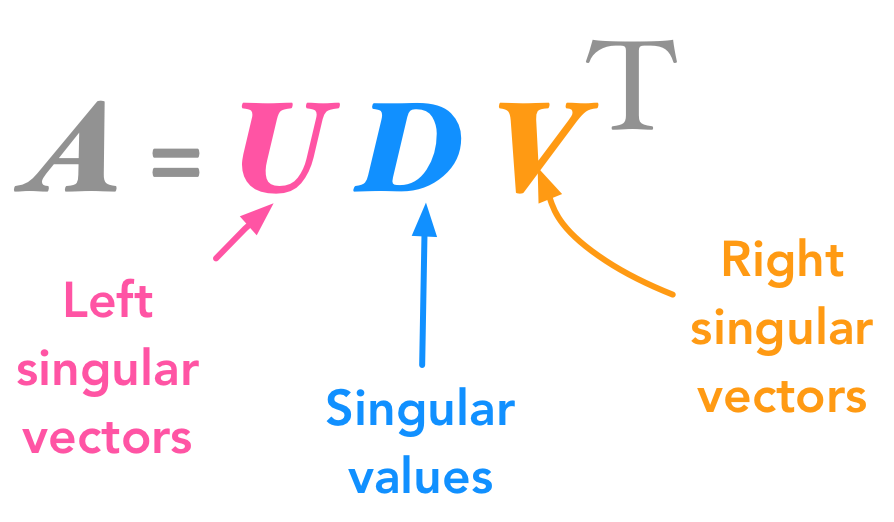

In [3]:
display(HTML(images_html[0]))


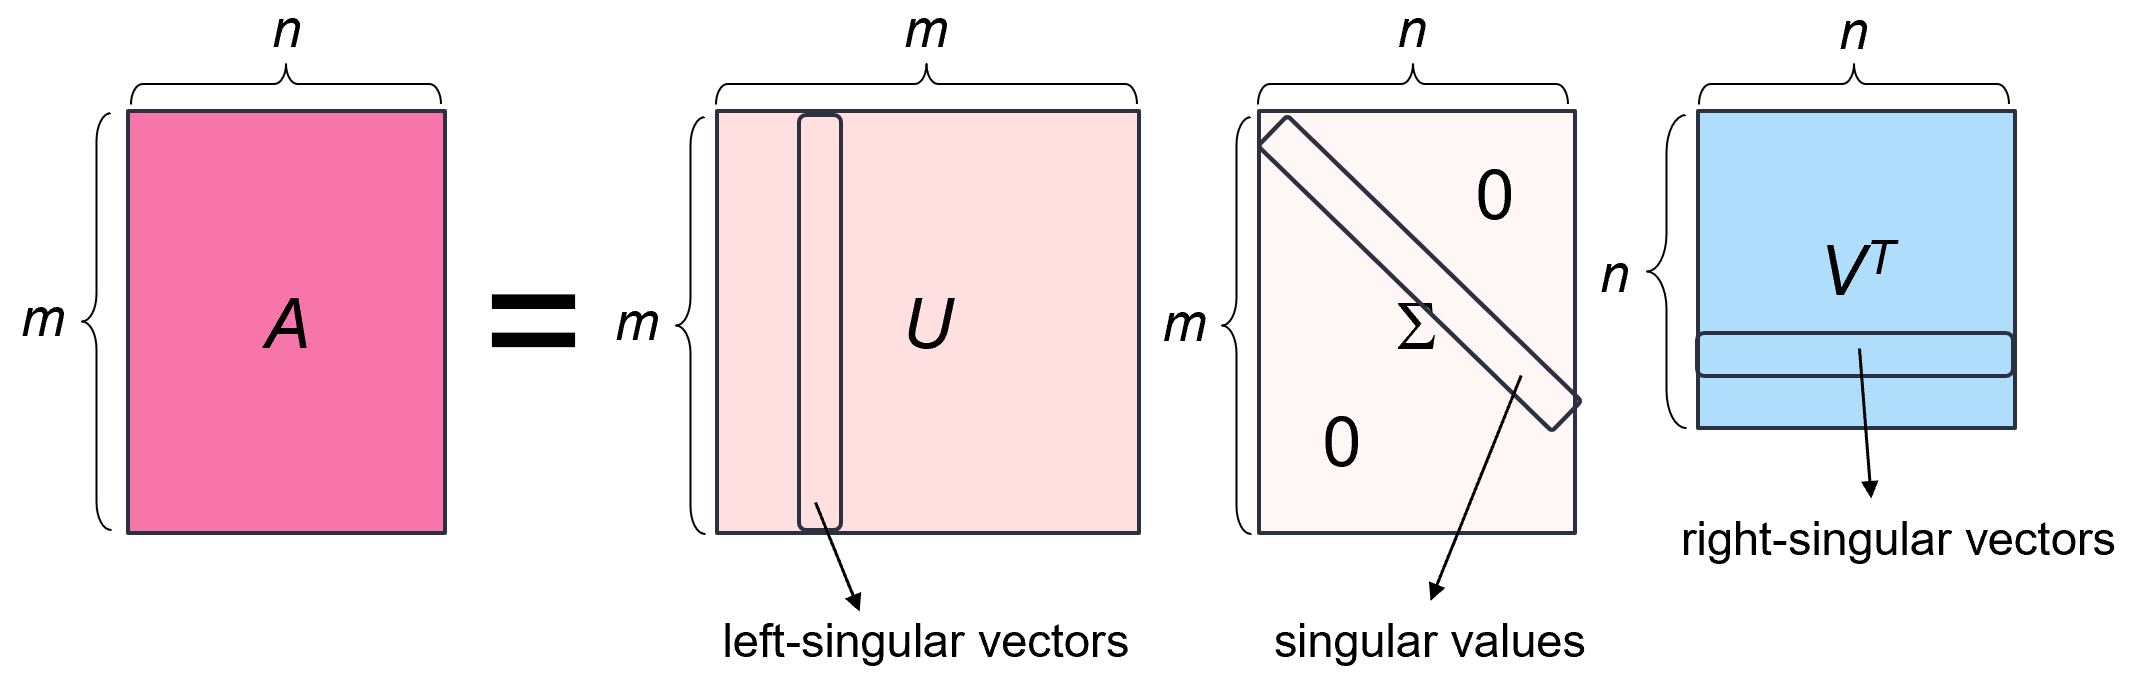

In [4]:
display(HTML(images_html[1]))


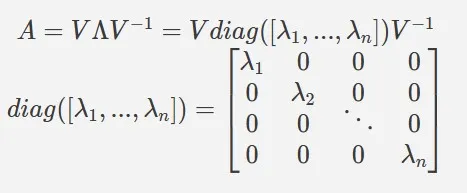

In [5]:
display(HTML(images_html[2]))


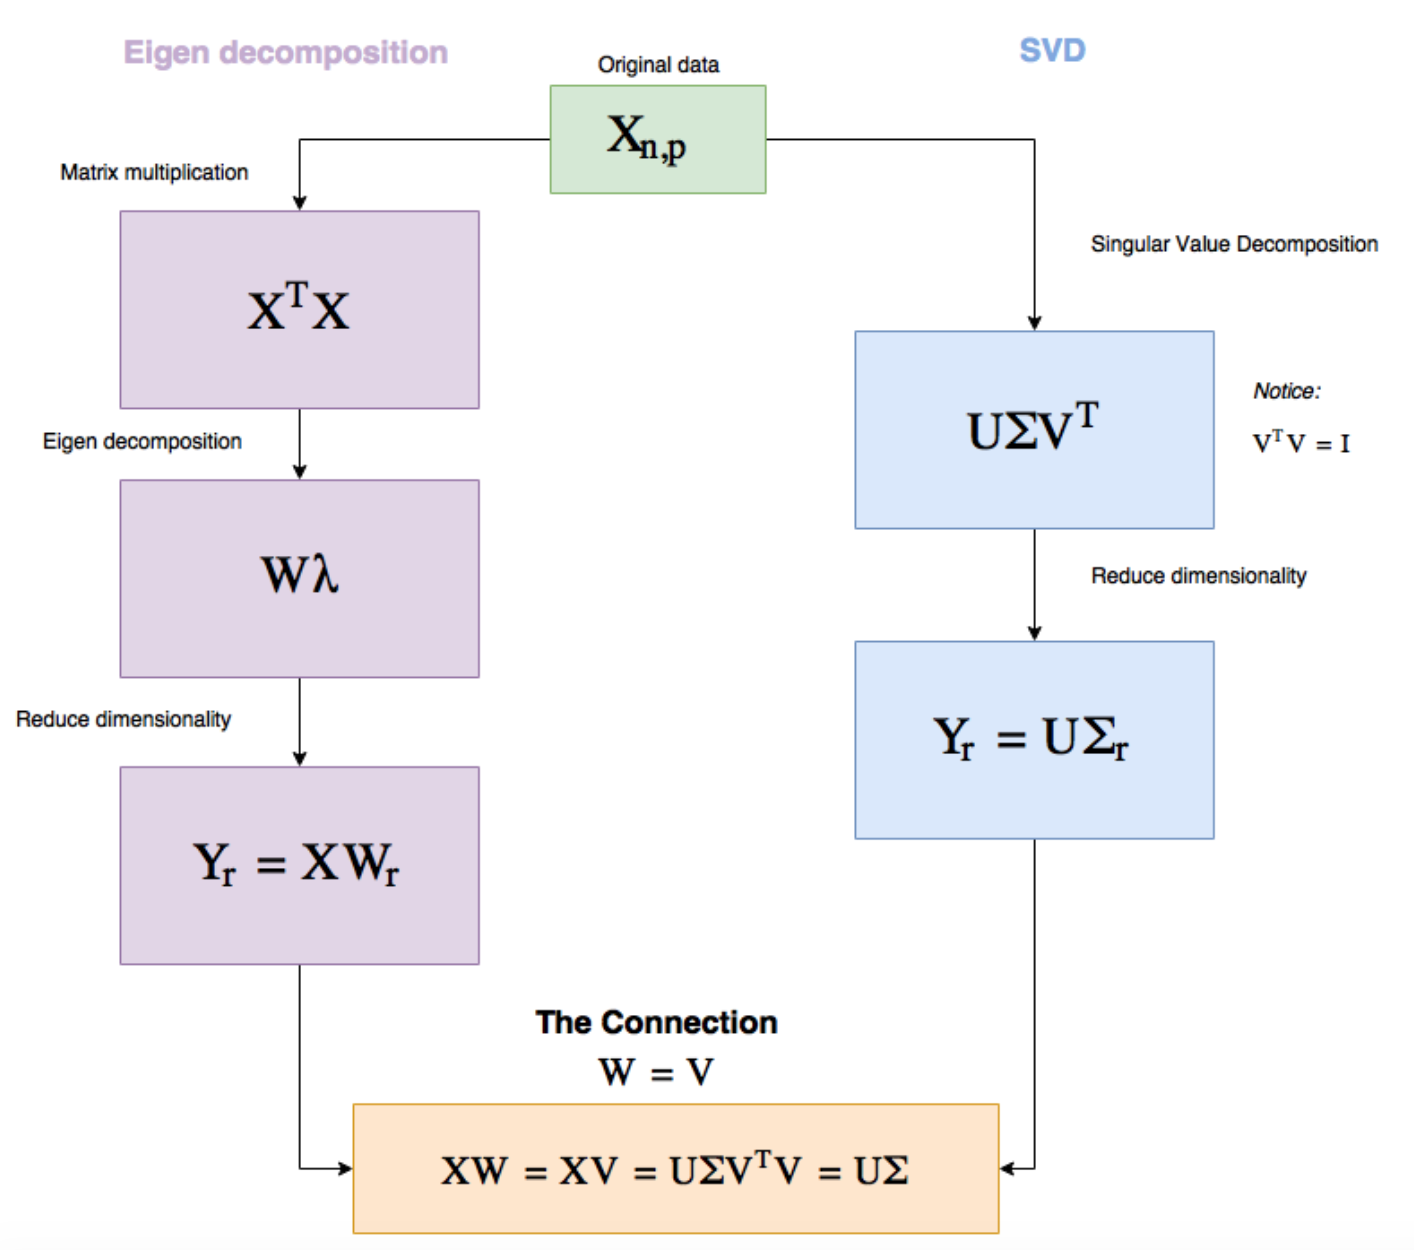

In [6]:
display(HTML(images_html[3]))

#### Load the Dataset

In [13]:
# This dataset contains 13 features related to wine chemical properties
# and 3 target classes representing different wine types
wine_data = load_wine()

# Convert to pandas DataFrame for easier manipulation
# Create DataFrame with feature data
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add target column
df['target'] = wine_data.target

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {len(wine_data.feature_names)}")
print(f"Number of classes: {len(wine_data.target_names)}")
print(f"Class names: {wine_data.target_names}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


Dataset loaded successfully!
Dataset shape: (178, 14)
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']

First 5 rows of the dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Exploratory Data Analysis

Dataset Information:
Total samples: 178
Total features: 13

Class distribution:
Class 0 (class_0): 59 samples
Class 1 (class_1): 71 samples
Class 2 (class_2): 48 samples

Feature statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.0

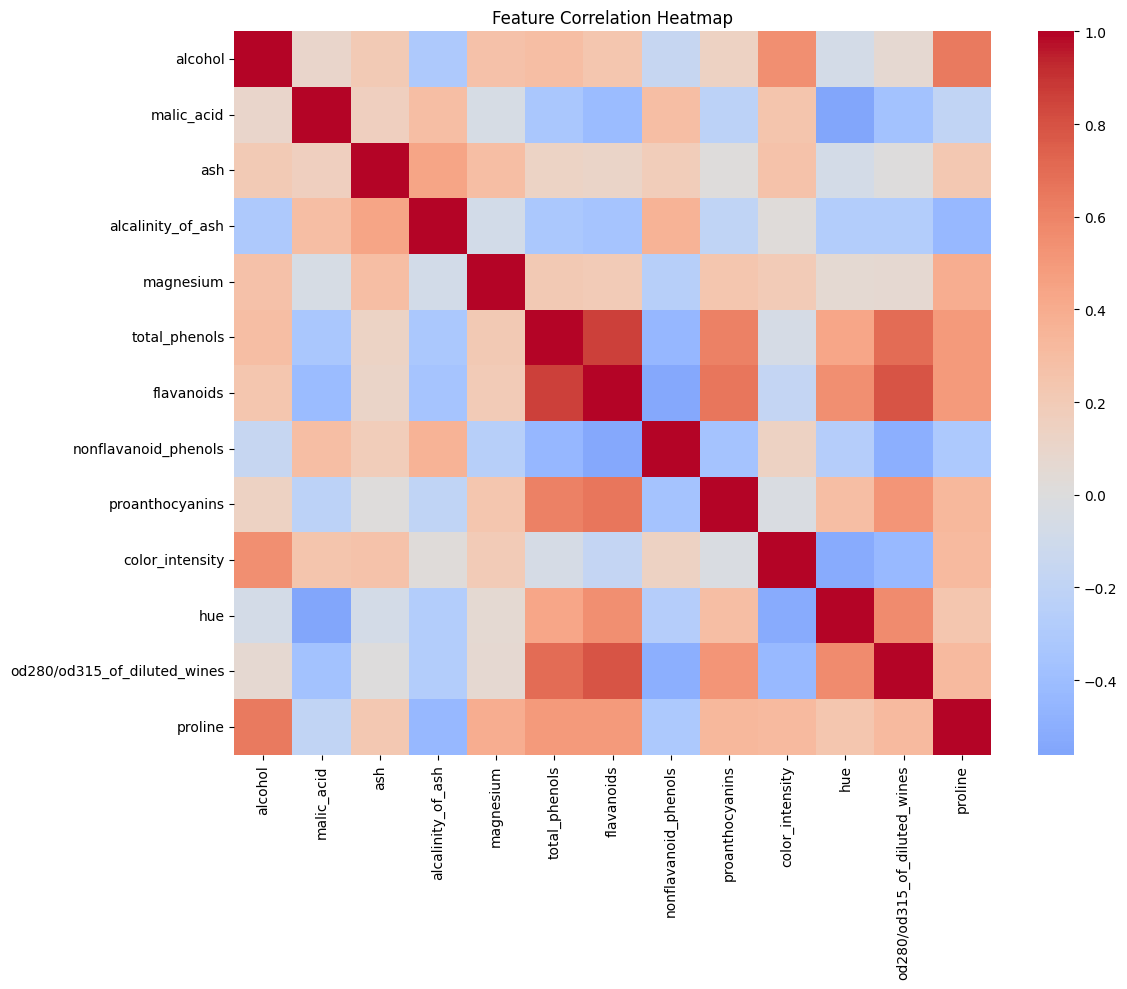


Highly correlated feature pairs (correlation > 0.8):
total_phenols - flavanoids: 0.865


In [14]:
# Explore the dataset structure and characteristics
print("Dataset Information:")
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 1}")  # Exclude target column

# Check class distribution
print("\nClass distribution:")
class_counts = df['target'].value_counts().sort_index()
for i, count in enumerate(class_counts):
    print(f"Class {i} ({wine_data.target_names[i]}): {count} samples")

# Display basic statistics for all features
print("\nFeature statistics:")
feature_stats = df.drop('target', axis=1).describe()
print(feature_stats)

# Create correlation heatmap to visualize feature relationships
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print(f"\nHighly correlated feature pairs (correlation > 0.8):")
# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  correlation_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


#### Feature-Label Split

In [15]:
# Separate features (X) from target labels (y)
# X contains all the input features that the model will use for prediction
# y contains the target labels that the model will try to predict

X = df.drop('target', axis=1)  # Features: all columns except 'target'
y = df['target']               # Labels: the 'target' column

print("Feature-Label split completed:")
print(f"Features (X) shape: {X.shape}")
print(f"Labels (y) shape: {y.shape}")

# Display feature names
print(f"\nFeature names:")
for i, feature in enumerate(X.columns):
    print(f"{i+1:2d}. {feature}")

# Display label distribution
print(f"\nLabel distribution:")
for class_id, class_name in enumerate(wine_data.target_names):
    count = sum(y == class_id)
    print(f"Class {class_id} ({class_name}): {count} samples")


Feature-Label split completed:
Features (X) shape: (178, 13)
Labels (y) shape: (178,)

Feature names:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Label distribution:
Class 0 (class_0): 59 samples
Class 1 (class_1): 71 samples
Class 2 (class_2): 48 samples


#### Feature Standardization

In [16]:
# Standardize features before applying PCA
# PCA is sensitive to the scale of features, so standardization is crucial
# StandardScaler transforms features to have mean=0 and standard deviation=1

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
# This calculates the mean and standard deviation for each feature
# and then scales the data accordingly
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature standardization completed!")
print(f"Original features shape: {X.shape}")
print(f"Scaled features shape: {X_scaled.shape}")

# Compare original vs scaled statistics
print("\nComparison of feature statistics:")
print("Original data - First feature statistics:")
print(f"Mean: {X.iloc[:, 0].mean():.3f}, Std: {X.iloc[:, 0].std():.3f}")
print("Scaled data - First feature statistics:")
print(f"Mean: {X_scaled_df.iloc[:, 0].mean():.3f}, Std: {X_scaled_df.iloc[:, 0].std():.3f}")

# Verify that all scaled features have mean≈0 and std≈1
print(f"\nScaled data overall statistics:")
print(f"Mean of all features: {X_scaled_df.mean().mean():.6f}")
print(f"Standard deviation of all features: {X_scaled_df.std().mean():.6f}")


Feature standardization completed!
Original features shape: (178, 13)
Scaled features shape: (178, 13)

Comparison of feature statistics:
Original data - First feature statistics:
Mean: 13.001, Std: 0.812
Scaled data - First feature statistics:
Mean: 0.000, Std: 1.003

Scaled data overall statistics:
Mean of all features: 0.000000
Standard deviation of all features: 1.002821


#### Apply PCA

PCA Analysis Results:
Total number of components: 13

Variance explained by each component:
PC 1: 0.3620 (36.20%) - Cumulative: 0.3620 (36.20%)
PC 2: 0.1921 (19.21%) - Cumulative: 0.5541 (55.41%)
PC 3: 0.1112 (11.12%) - Cumulative: 0.6653 (66.53%)
PC 4: 0.0707 (7.07%) - Cumulative: 0.7360 (73.60%)
PC 5: 0.0656 (6.56%) - Cumulative: 0.8016 (80.16%)
PC 6: 0.0494 (4.94%) - Cumulative: 0.8510 (85.10%)
PC 7: 0.0424 (4.24%) - Cumulative: 0.8934 (89.34%)
PC 8: 0.0268 (2.68%) - Cumulative: 0.9202 (92.02%)
PC 9: 0.0222 (2.22%) - Cumulative: 0.9424 (94.24%)
PC10: 0.0193 (1.93%) - Cumulative: 0.9617 (96.17%)
PC11: 0.0174 (1.74%) - Cumulative: 0.9791 (97.91%)
PC12: 0.0130 (1.30%) - Cumulative: 0.9920 (99.20%)
PC13: 0.0080 (0.80%) - Cumulative: 1.0000 (100.00%)


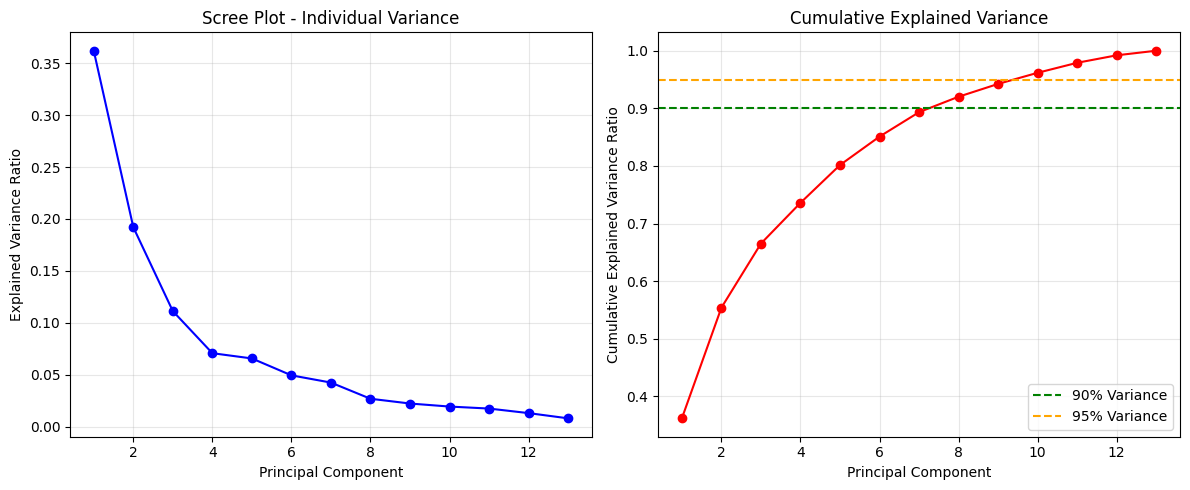


Components needed to retain:
90% of variance: 8 components
95% of variance: 10 components


In [17]:
# PCA finds the directions (principal components) that capture the most variance in the data

# Initialize PCA without specifying number of components
# This will compute all possible components
pca_full = PCA()

# Fit PCA on the scaled data
pca_full.fit(X_scaled)

# Get explained variance ratios for each component
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("PCA Analysis Results:")
print(f"Total number of components: {len(explained_variance_ratio)}")

# Display variance explained by each component
print("\nVariance explained by each component:")
for i, (var_ratio, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"PC{i+1:2d}: {var_ratio:.4f} ({var_ratio*100:.2f}%) - Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Create scree plot to visualize explained variance
plt.figure(figsize=(12, 5))

# Subplot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Individual Variance')
plt.grid(True, alpha=0.3)

# Subplot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components needed for 90% and 95% variance
components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"\nComponents needed to retain:")
print(f"90% of variance: {components_90} components")
print(f"95% of variance: {components_95} components")


#### Transform Features with PCA

In [18]:
# Choose number of components that retain approximately 95% of variance
# This balances dimensionality reduction with information preservation
n_components = components_95

print(f"Applying PCA with {n_components} components (retains {cumulative_variance_ratio[n_components-1]*100:.2f}% variance)")

# Initialize PCA with chosen number of components
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for PCA-transformed features
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)

print("PCA transformation completed!")
print(f"Original feature space: {X_scaled.shape}")
print(f"Reduced feature space: {X_pca.shape}")
print(f"Dimensionality reduction: {X.shape[1]} → {X_pca.shape[1]} features")
print(f"Reduction ratio: {(1 - X_pca.shape[1]/X.shape[1])*100:.1f}%")

# Display first few rows of PCA-transformed data
print(f"\nFirst 5 rows of PCA-transformed features:")
print(X_pca_df.head())

# Show the amount of variance captured by selected components
print(f"\nVariance explained by selected {n_components} components:")
for i in range(n_components):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.4f} ({pca.explained_variance_ratio_[i]*100:.2f}%)")
print(f"Total variance retained: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")


Applying PCA with 10 components (retains 96.17% variance)
PCA transformation completed!
Original feature space: (178, 13)
Reduced feature space: (178, 10)
Dimensionality reduction: 13 → 10 features
Reduction ratio: 23.1%

First 5 rows of PCA-transformed features:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  
0 -0.065139 -0.641443  1.020956  
1 -1.024416  0.308847  0.159701  
2  0.344216  1.177834  0.113361  
3 -0.643593 -0.052544  0.239413  
4 -0.416700 -0.326819 -0.078366  

Variance explained by selected 10 components:
PC1: 0.3620 (36.20%)
PC2: 0.1921 (

#### Split Train and Test Sets

In [19]:
# Split both original and PCA-transformed data into training and testing sets
# Use the same random_state to ensure fair comparison between models

# Set parameters for train-test split
test_size = 0.3  # 30% for testing, 70% for training
random_state = 42  # For reproducible results

# Split original scaled data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=random_state, stratify=y
)

# Split PCA-transformed data
# Note: We use the same y_train and y_test to ensure identical splits
X_train_pca, X_test_pca, y_train_check, y_test_check = train_test_split(
    X_pca, y, test_size=test_size, random_state=random_state, stratify=y
)

# Verify that the target splits are identical
assert np.array_equal(y_train, y_train_check), "Training target splits don't match!"
assert np.array_equal(y_test, y_test_check), "Testing target splits don't match!"

print("Train-test split completed successfully!")
print("\nDataset split summary:")
print(f"Training samples: {len(X_train_orig)} ({(1-test_size)*100:.0f}%)")
print(f"Testing samples: {len(X_test_orig)} ({test_size*100:.0f}%)")

print(f"\nOriginal features:")
print(f"  Training set: {X_train_orig.shape}")
print(f"  Testing set: {X_test_orig.shape}")

print(f"\nPCA features:")
print(f"  Training set: {X_train_pca.shape}")
print(f"  Testing set: {X_test_pca.shape}")

# Check class distribution in train and test sets
print(f"\nClass distribution in training set:")
train_counts = pd.Series(y_train).value_counts().sort_index()
for i, count in enumerate(train_counts):
    print(f"Class {i}: {count} samples ({count/len(y_train)*100:.1f}%)")

print(f"\nClass distribution in testing set:")
test_counts = pd.Series(y_test).value_counts().sort_index()
for i, count in enumerate(test_counts):
    print(f"Class {i}: {count} samples ({count/len(y_test)*100:.1f}%)")


Train-test split completed successfully!

Dataset split summary:
Training samples: 124 (70%)
Testing samples: 54 (30%)

Original features:
  Training set: (124, 13)
  Testing set: (54, 13)

PCA features:
  Training set: (124, 10)
  Testing set: (54, 10)

Class distribution in training set:
Class 0: 41 samples (33.1%)
Class 1: 50 samples (40.3%)
Class 2: 33 samples (26.6%)

Class distribution in testing set:
Class 0: 18 samples (33.3%)
Class 1: 21 samples (38.9%)
Class 2: 15 samples (27.8%)


#### Train Model Without PCA
Train a baseline classifier using original features (scaled but not PCA-transformed)\
We'll use Random Forest as it's robust and provides good performance

Training baseline model with original features...
Baseline Model (Original Features) Results:
Test Accuracy: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


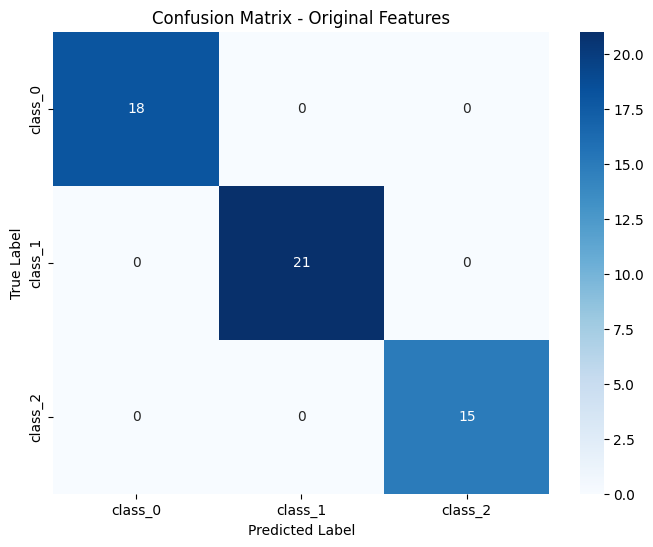


Top 10 Most Important Features:
                     feature  importance
                     alcohol    0.167810
             color_intensity    0.160638
                  flavanoids    0.159106
                     proline    0.120715
                         hue    0.106947
od280/od315_of_diluted_wines    0.094098
                  malic_acid    0.038407
               total_phenols    0.036747
                   magnesium    0.034079
           alcalinity_of_ash    0.033516


In [20]:
print("Training baseline model with original features...")

# Initialize Random Forest classifier
# Use fixed random_state for reproducible results
rf_original = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    random_state=42,     # For reproducible results
    max_depth=10,        # Prevent overfitting
    min_samples_split=5  # Minimum samples required to split a node
)

# Train the model on original features
rf_original.fit(X_train_orig, y_train)

# Make predictions on test set
y_pred_original = rf_original.predict(X_test_orig)

# Calculate accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)

print("Baseline Model (Original Features) Results:")
print(f"Test Accuracy: {accuracy_original:.4f} ({accuracy_original*100:.2f}%)")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original, 
                          target_names=wine_data.target_names))

# Display confusion matrix
print("Confusion Matrix:")
cm_original = confusion_matrix(y_test, y_pred_original)
print(cm_original)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title('Confusion Matrix - Original Features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance (top 10)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_original.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


#### Train Model With PCA Features
Train the same classifier using PCA-transformed features\
This allows direct comparison of performance

Training model with PCA-transformed features...
PCA Model Results:
Test Accuracy: 0.9259 (92.59%)

Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.90      0.90      0.90        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

Confusion Matrix:
[[16  2  0]
 [ 2 19  0]
 [ 0  0 15]]


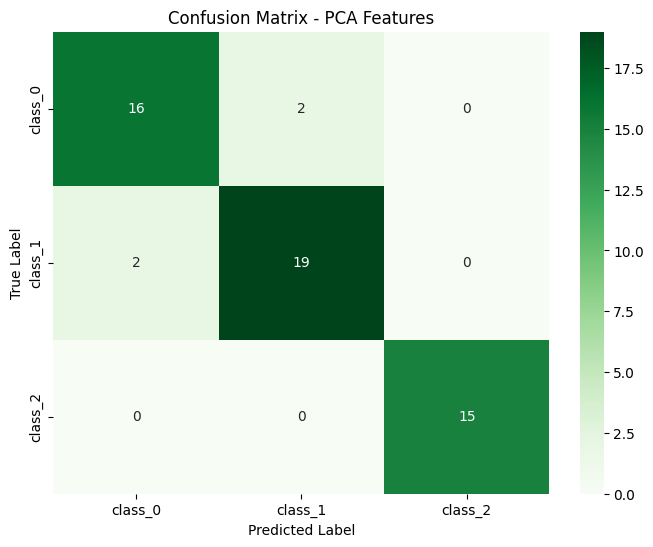


PCA Component Importance:
component  importance
      PC2    0.376371
      PC1    0.369830
      PC5    0.046051
      PC6    0.044671
      PC7    0.039297
      PC8    0.034303
      PC3    0.031461
      PC4    0.021967
      PC9    0.019143
     PC10    0.016906

Feature space comparison:
Original features: 13 dimensions
PCA features: 10 dimensions
Dimensionality reduction: 23.1%


In [21]:


print("Training model with PCA-transformed features...")

# Initialize Random Forest classifier with same parameters as baseline
rf_pca = RandomForestClassifier(
    n_estimators=100,    # Same number of trees
    random_state=42,     # Same random state for fair comparison
    max_depth=10,        # Same max depth
    min_samples_split=5  # Same minimum samples per split
)

# Train the model on PCA features
rf_pca.fit(X_train_pca, y_train)

# Make predictions on test set
y_pred_pca = rf_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("PCA Model Results:")
print(f"Test Accuracy: {accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca, 
                          target_names=wine_data.target_names))

# Display confusion matrix
print("Confusion Matrix:")
cm_pca = confusion_matrix(y_test, y_pred_pca)
print(cm_pca)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title('Confusion Matrix - PCA Features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# PCA component importance
pca_importance = pd.DataFrame({
    'component': pca_feature_names,
    'importance': rf_pca.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nPCA Component Importance:")
print(pca_importance.to_string(index=False))

# Calculate training time difference (approximate)
print(f"\nFeature space comparison:")
print(f"Original features: {X_train_orig.shape[1]} dimensions")
print(f"PCA features: {X_train_pca.shape[1]} dimensions")
print(f"Dimensionality reduction: {(1 - X_train_pca.shape[1]/X_train_orig.shape[1])*100:.1f}%")


#### Comparison and Analysis

MODEL PERFORMANCE COMPARISON
             Metric Original Features     PCA Features
 Number of Features                13               10
      Test Accuracy  1.0000 (100.00%)  0.9259 (92.59%)
Accuracy Difference          Baseline -0.0741 (-7.41%)

DETAILED ANALYSIS
Dimensionality Reduction:
  • Reduced from 13 to 10 features
  • Reduction ratio: 23.1%
  • Variance retained: 96.17%

Performance Impact:
  • PCA decreased accuracy by 0.0741 (7.41%)
  • The removed components contained important discriminative information

Computational Benefits:
  • Reduced feature space leads to faster training and prediction
  • Lower memory requirements for storing the model
  • Reduced risk of overfitting with fewer features

When to use PCA:
  ⚠ Consider the trade-off carefully
  ⚠ Accuracy loss might not justify the dimensionality reduction


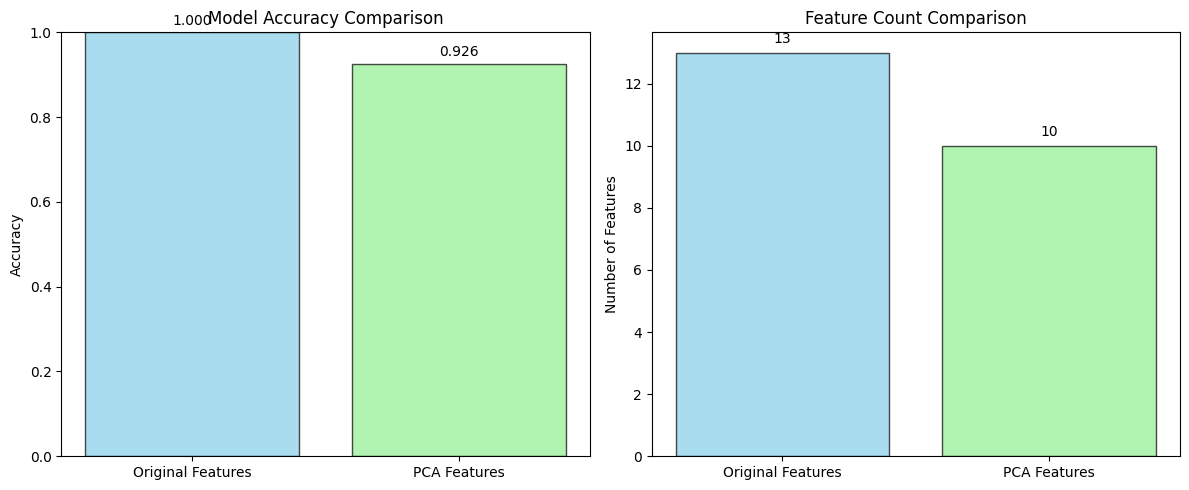

In [22]:
# Analyze the trade-offs between dimensionality reduction and model performance

print("="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Create comparison summary
comparison_data = {
    'Metric': ['Number of Features', 'Test Accuracy', 'Accuracy Difference'],
    'Original Features': [
        X_train_orig.shape[1], 
        f"{accuracy_original:.4f} ({accuracy_original*100:.2f}%)",
        "Baseline"
    ],
    'PCA Features': [
        X_train_pca.shape[1],
        f"{accuracy_pca:.4f} ({accuracy_pca*100:.2f}%)",
        f"{accuracy_pca - accuracy_original:+.4f} ({(accuracy_pca - accuracy_original)*100:+.2f}%)"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Detailed analysis
print(f"\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

print(f"Dimensionality Reduction:")
reduction_ratio = (1 - X_train_pca.shape[1]/X_train_orig.shape[1]) * 100
print(f"  • Reduced from {X_train_orig.shape[1]} to {X_train_pca.shape[1]} features")
print(f"  • Reduction ratio: {reduction_ratio:.1f}%")
print(f"  • Variance retained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print(f"\nPerformance Impact:")
accuracy_diff = accuracy_pca - accuracy_original
if accuracy_diff > 0:
    print(f"  • PCA improved accuracy by {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")
    print(f"  • This suggests the original features contained some noise or redundancy")
elif accuracy_diff < -0.01:  # More than 1% decrease
    print(f"  • PCA decreased accuracy by {abs(accuracy_diff):.4f} ({abs(accuracy_diff)*100:.2f}%)")
    print(f"  • The removed components contained important discriminative information")
else:
    print(f"  • PCA maintained similar accuracy (difference: {accuracy_diff:+.4f})")
    print(f"  • Good balance between dimensionality reduction and performance")

print(f"\nComputational Benefits:")
print(f"  • Reduced feature space leads to faster training and prediction")
print(f"  • Lower memory requirements for storing the model")
print(f"  • Reduced risk of overfitting with fewer features")

print(f"\nWhen to use PCA:")
if accuracy_diff >= -0.01:  # Less than 1% decrease
    print(f"  ✓ PCA is beneficial for this dataset")
    print(f"  ✓ Significant dimensionality reduction with minimal accuracy loss")
else:
    print(f"  ⚠ Consider the trade-off carefully")
    print(f"  ⚠ Accuracy loss might not justify the dimensionality reduction")

# Visualize comparison
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy comparison
plt.subplot(1, 2, 1)
models = ['Original Features', 'PCA Features']
accuracies = [accuracy_original, accuracy_pca]
colors = ['skyblue', 'lightgreen']
bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Subplot 2: Feature count comparison
plt.subplot(1, 2, 2)
feature_counts = [X_train_orig.shape[1], X_train_pca.shape[1]]
bars = plt.bar(models, feature_counts, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Number of Features')
plt.title('Feature Count Comparison')

# Add value labels on bars
for bar, count in zip(bars, feature_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Conclusion

### Key Findings

Through this PCA analysis, we successfully reduced feature dimensionality while retaining ~95% of variance and demonstrated the trade-off between computational efficiency and predictive accuracy.

### When to Use PCA

**PCA is beneficial for:**
- High-dimensional datasets (hundreds/thousands of features)
- Highly correlated or redundant features
- Limited computational resources
- Data visualization needs

**Consider alternatives when:**
- Few features (< 20-50)
- All features are crucial for prediction
- Feature interpretability is required

### Real-World Applications

PCA is commonly used in image processing, text analysis, genomics, finance, and sensor data processing where dimensionality reduction improves efficiency without sacrificing performance.

### Best Practices

1. Always standardize features before PCA
2. Retain 90-95% of variance as starting point
3. Compare performance with/without PCA
4. Use cross-validation for robust evaluation

PCA is a powerful tool for feature engineering that can significantly improve machine learning pipeline efficiency and effectiveness.
